In [15]:
#Import Modules
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import sklearn.svm as svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [16]:
#Download Dataset from Kaggle
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
dataset = pd.read_csv(f"{path}/heart.csv")

In [17]:
#Dataset Preprocessing

label = LabelEncoder()
scaler = StandardScaler()

dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

X = dataset.drop(columns=['target'])
y = dataset['target']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = label.fit_transform(train_y)
test_y = label.transform(test_y)

In [18]:
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [19]:
#Model Training
model = svm.SVC(kernel='linear', C=1.0, random_state=42)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)
decision_scores = model.decision_function(test_X)

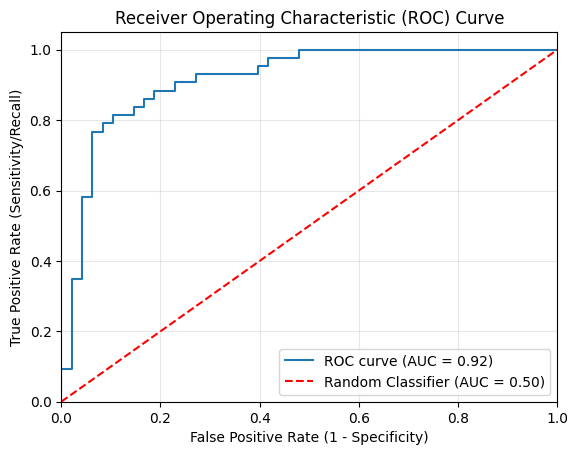

In [20]:
# Get decision scores instead of binary predictions for better ROC curve
fpr, tpr, thresholds = metrics.roc_curve(test_y, decision_scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier (AUC = 0.50)') # Diagonal random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

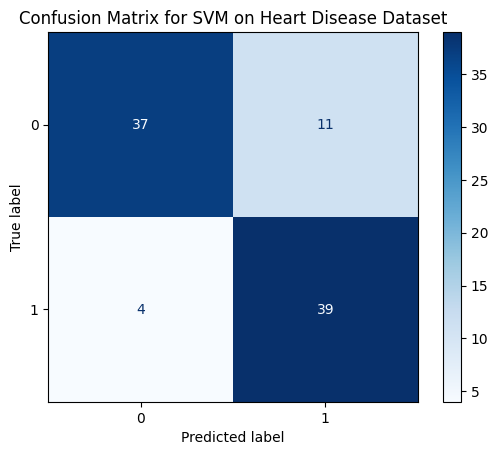

In [21]:
#Confusion Matrix Visualization
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on Heart Disease Dataset")
plt.show()